In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
sns.set(font_scale=1.25, style='whitegrid')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})

df_plot=pd.read_csv("blackbox_results.csv")
df_plot['model_size'] = np.log(df_plot.model_size)
df_plot

df_nl = pd.read_csv("TIRNL.csv")

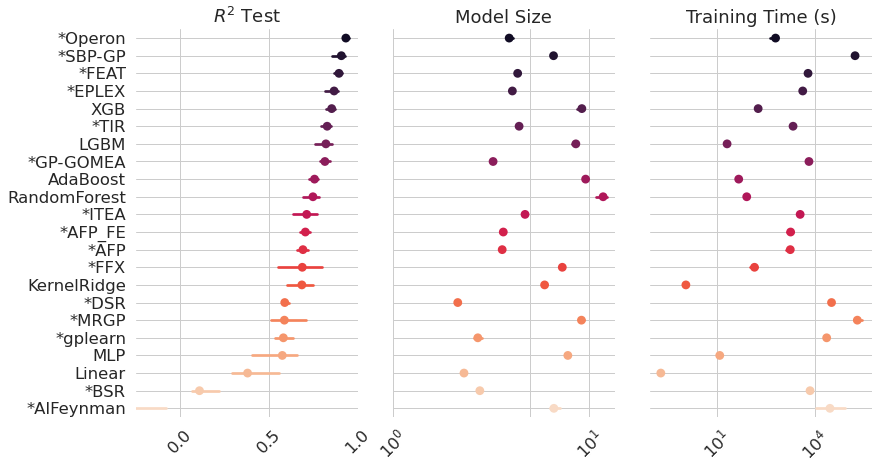

In [48]:
# Make the PairGrid
sns.set_style("whitegrid")

# different options
x_vars=[
        'r2_test',
        'model_size',
        'training time (s)',
]
order = df_plot.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index
g = sns.PairGrid(df_plot, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 

g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95,
      annot_kws={'rotation': 45}
     )

# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    if title == "Model Size":
        ax.set_xticks([1, 5, 10])
    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.tick_params(axis='x', labelrotation = 45)

sns.despine(left=True, bottom=True)
sns.set(font_scale=2)


#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/main_results.pdf", bbox_inches='tight')

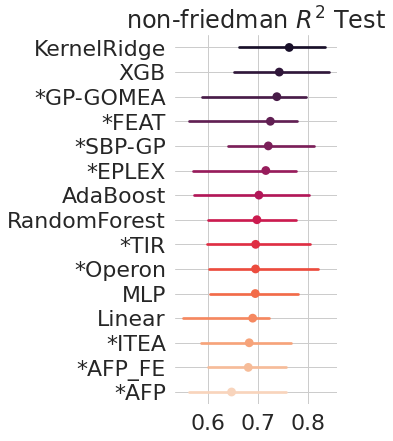

In [42]:
# Make the PairGrid
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 24, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})

# different options
x_vars=[
        'r2_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plot[~df_plot.dataset.str.contains("_fri_")]#.sort_values(by='r2_test',ascending=False).head(10)

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','non-friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
sns.set(font_scale=1)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/nonfri_results.pdf", bbox_inches='tight')

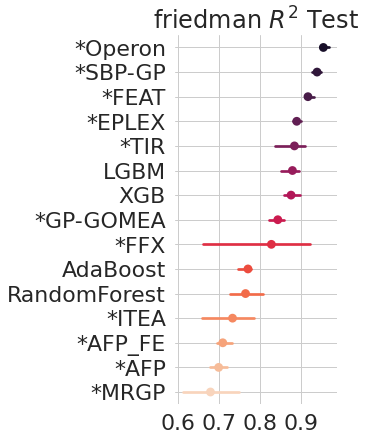

In [39]:
# Make the PairGrid
sns.set_style("whitegrid")

# different options
x_vars=[
        'r2_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plot[df_plot.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
sns.set(font_scale=1)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/fri_results.pdf", bbox_inches='tight')

TypeError: pointplot() got an unexpected keyword argument 'size'

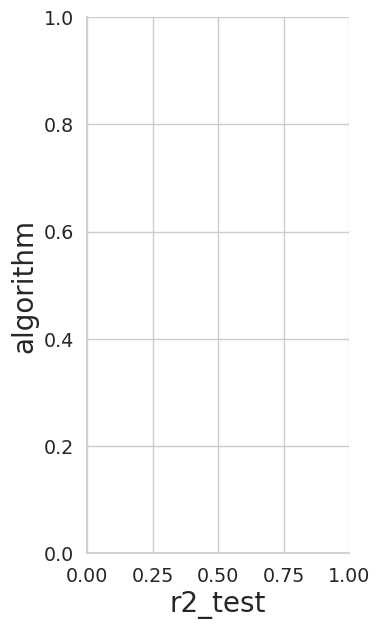

In [3]:
# Make the PairGrid
sns.set_style("whitegrid")

df_plotPenalty = pd.read_csv("blackboxPenalty.csv")

# different options
x_vars=[
        'r2_test',
        #'rmse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty
#dfg = df_p[df_p.algorithm == 'TIRMOO2'].groupby('dataset')[x_vars[0]].median()
#df_p = df_p[df_p.dataset.isin(dfg.index)]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([.6,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
sns.set(font_scale=1)
#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/penalty_results.pdf", bbox_inches='tight')


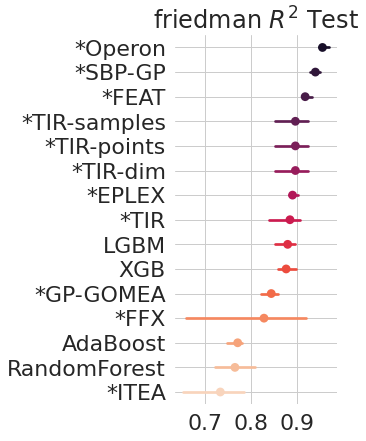

In [52]:
# Make the PairGrid
sns.set_style("whitegrid")

df_plotPenalty = pd.read_csv("blackboxPenalty.csv")

# different options
x_vars=[
        'r2_test',
        #'log_mse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
sns.set(font_scale=1)
#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/penalty_fri_results.pdf", bbox_inches='tight')

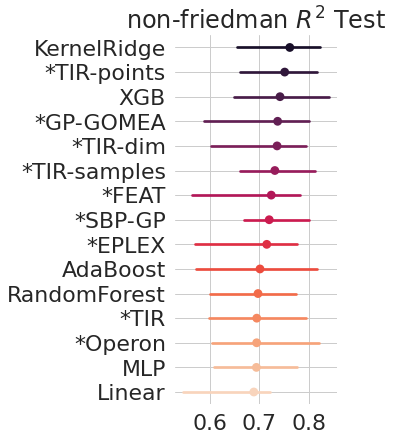

In [55]:
# Make the PairGrid
sns.set_style("whitegrid")

smallests = ["192_vineyard", "228_elusage", "485_analcatdata_vehicle", "1096_FacultySalaries", 
             "523_analcatdata_neavote", "663_rabe_266", "687_sleuth_ex1605", "659_sleuth_ex1714",
             "678_visualizing_environmental", "611_fri_c3_100_5", "594_fri_c2_100_5", "624_fri_c0_100_5",
             "656_fri_c1_100_5", "210_cloud", "706_sleuth_case1202", "1089_USCrime", "712_chscase_geyser1",
             "542_pollution", "527_analcatdata_election2000"]


df_plotPenalty = pd.read_csv("blackboxPenalty.csv")

# different options
x_vars=[
        'r2_test',
        #'log_mse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','non-friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
sns.set(font_scale=1)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/penalty_nonfri_results.pdf", bbox_inches='tight')

In [59]:
import Orange

# critical difference for Nemenyi with alpha=0.05
def cd_plot(df, pname):
    if df.empty:
        return
    df_pivot = pd.pivot_table(df, index='algorithm', columns=['dataset'], values='r2_test')
    n = len(df_pivot.columns)
    ranks = df_pivot.rank(ascending=False).mean(axis=1).sort_values(ascending=True)    
    names = ranks.index.values[:15]
    avranks = ranks.values[:15]
    
    cd = Orange.evaluation.compute_CD(avranks, n)
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
    plt.savefig(pname, bbox_inches='tight')
        
cd_plot(df_plotPenalty, "figs/cd_results.pdf")

ImportError: /home/olivetti/anaconda3/lib/python3.9/site-packages/PyQt5/QtCore.abi3.so: undefined symbol: _ZdlPvm, version Qt_5

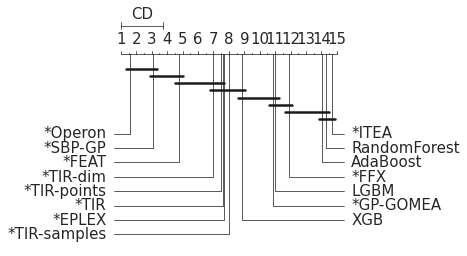

In [9]:
cd_plot(df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")], "figs/cd_fri_results.pdf")

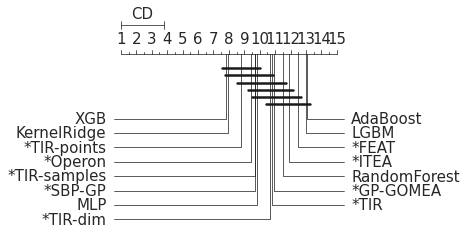

In [10]:
cd_plot(df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")],"figs/cd_nonfri_results.pdf")


In [57]:
def plot_selection(df, datasets, fname, friedman = False):
    sns.set_style("whitegrid")

    # different options
    x_vars=['r2_test']

    if friedman:
        df_p = df[(df.dataset.isin(datasets)) & (df.dataset.str.contains("_fri_"))]
    else:
        df_p = df[(df.dataset.isin(datasets)) & (~df.dataset.str.contains("_fri_"))]
    if df_p.empty:
        return

    order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
    g = sns.PairGrid(df_p, 
                     x_vars=x_vars,
                     y_vars=['algorithm'],
                     height=6.5, 
                     aspect=0.6,
                    )

    # Draw a dot plot 
    g.map(sns.pointplot, 
          size=10,
          orient="h",
          jitter=False,
          order=order,
          palette="rocket",
          linewidth=1,
          markeredgecolor='w',
          join=False,
          estimator=np.median,
          n_boot=1000,
          ci=95
         )
    # # Use semantically meaningful titles for the columns
    titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$') for x in x_vars]
    g.axes.flat[0].set_ylabel('')
    for ax, title in zip(g.axes.flat, titles):

        # Set a different title for each axes
        ax.set(title=title)
        ax.set_xlabel('')

        if any([n in title.lower() for n in ['size','time']]):
            ax.set_xscale('log')

        if title == '$R^2$ Test':
            ax.set_xlim([.4,1])

        # Make the grid horizontal instead of vertical
        ax.yaxis.grid(True)

    sns.despine(left=True, bottom=True)
    sns.set(font_scale=2)
    plt.savefig(f"figs/{fname}_{'fri' if friedman else 'nonfri'}_results.pdf", bbox_inches='tight')

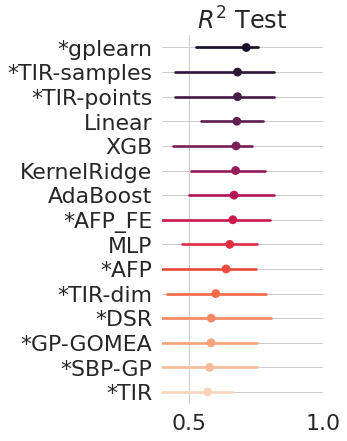

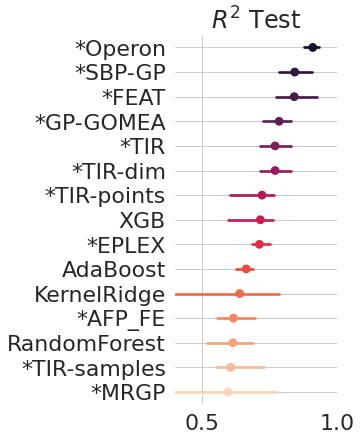

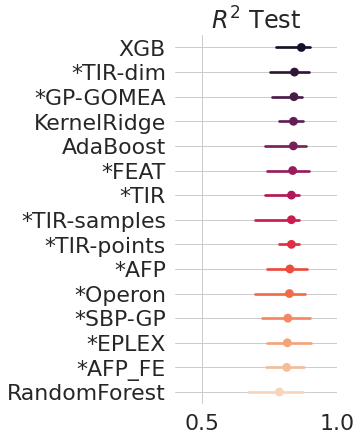

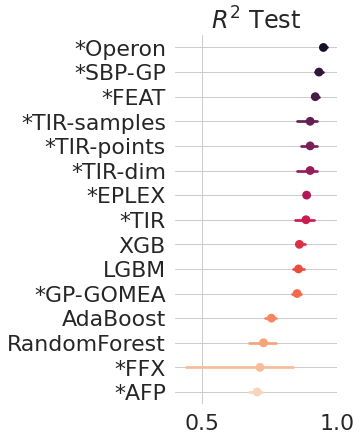

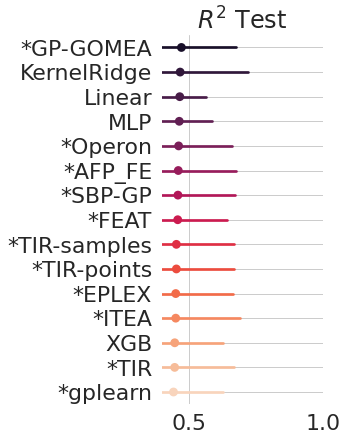

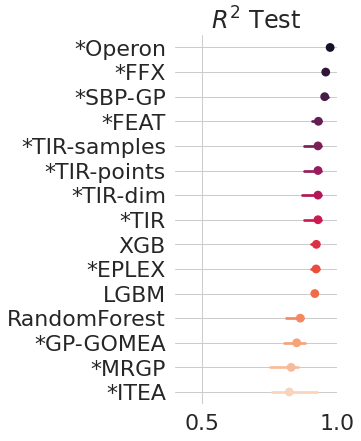

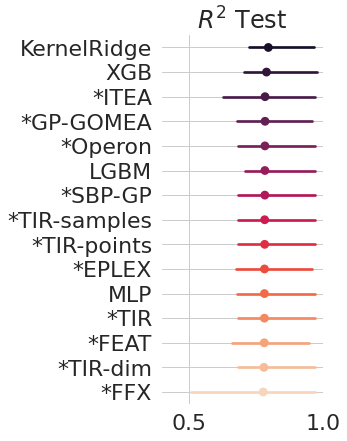

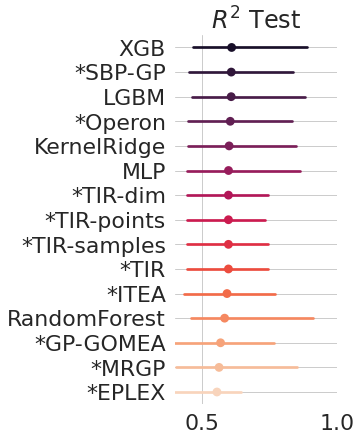

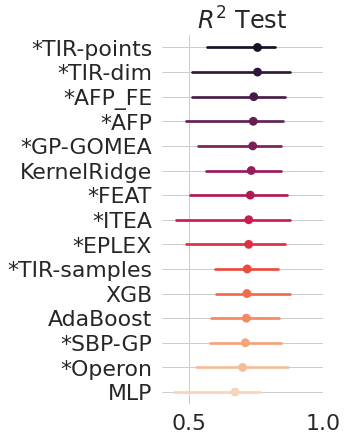

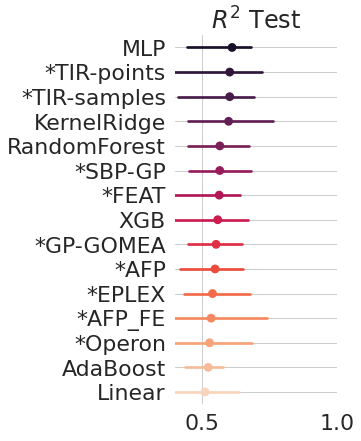

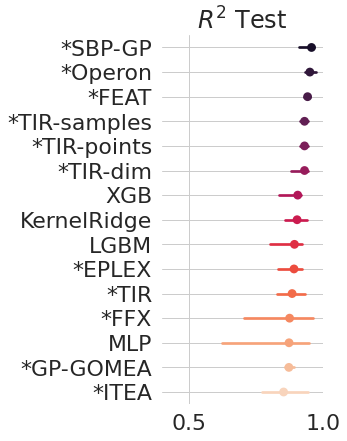

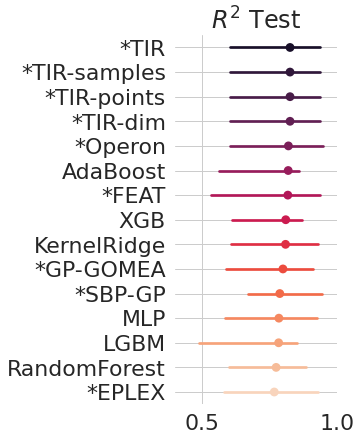

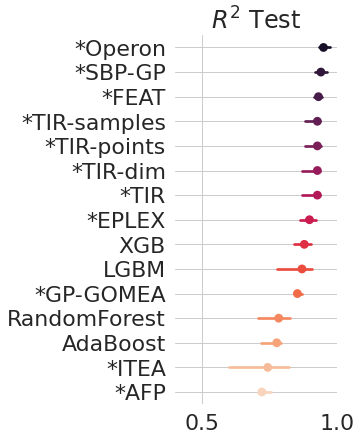

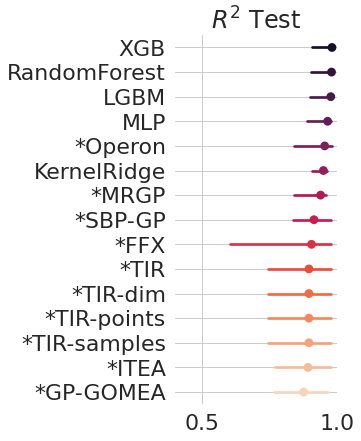

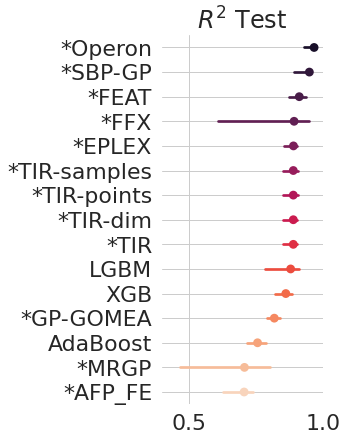

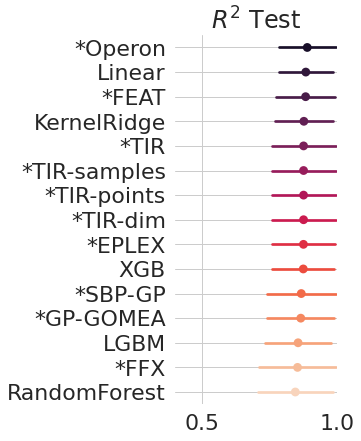

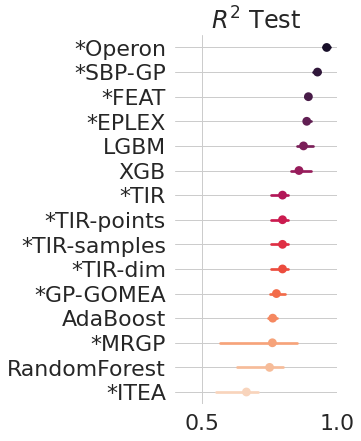

In [60]:
df_datasets = pd.read_csv("datasets_info.csv")
samples_ranges = [(0, 100), (101, 500), (501, 1000), (1001, 9999), (10000, 2000000)]
feats_ranges = [(0, 5), (6, 10), (11, 20), (21, 50), (51, 1001)]

for x,y in samples_ranges:
    names = df_datasets[(df_datasets.nsamples >= x) & (df_datasets.nsamples <= y)].name.values
    plot_selection(df_plotPenalty, names, f"nsamples_{x}_{y}")
    plot_selection(df_plotPenalty, names, f"nsamples_{x}_{y}", True)
    #cd_plot(df_plotPenalty[(df_plotPenalty.dataset.isin(names)) & (df_plotPenalty.dataset.str.contains("_fri_"))],f"figs/cd_nsamples_{x}_{y}_fri_results.pdf")

for x,y in feats_ranges:
    names = df_datasets[(df_datasets.nfeatures >= x) & (df_datasets.nfeatures <= y)].name.values
    plot_selection(df_plotPenalty, names, f"nfeatures_{x}_{y}")
    plot_selection(df_plotPenalty, names, f"nfeatures_{x}_{y}", True)
    #cd_plot(df_plotPenalty[(df_plotPenalty.dataset.isin(names)) & (df_plotPenalty.dataset.str.contains("_fri_"))],f"figs/cd_nfeatures_{x}_{y}_fri_results.pdf")


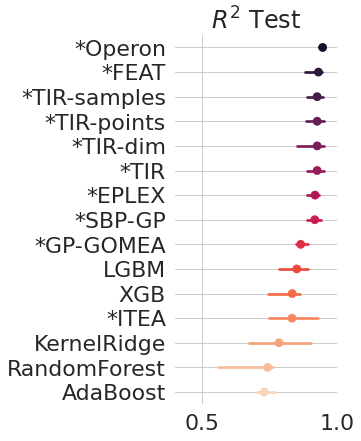

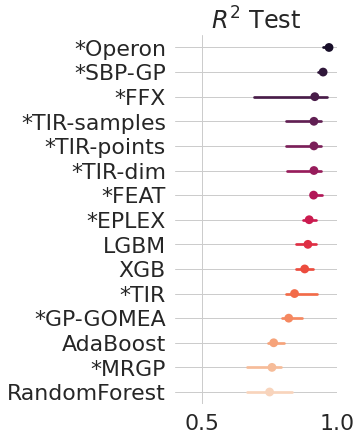

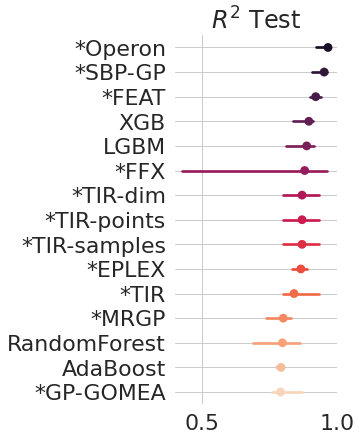

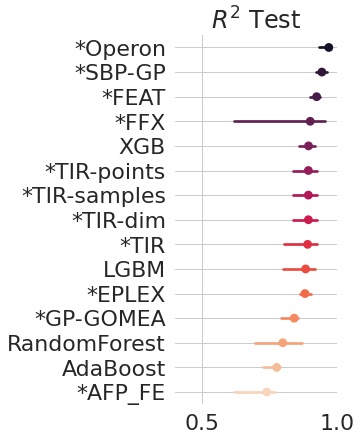

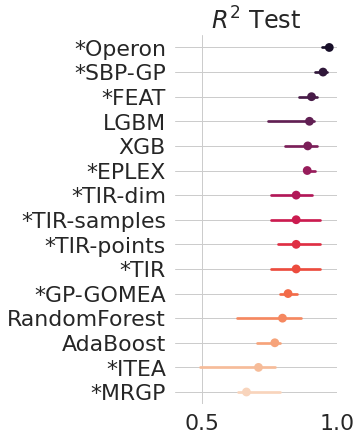

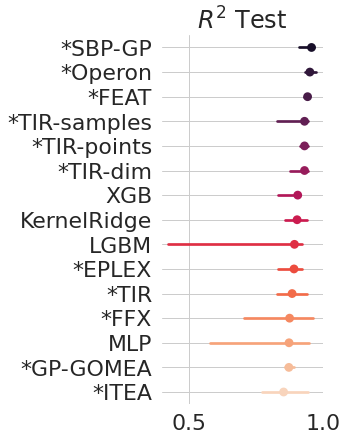

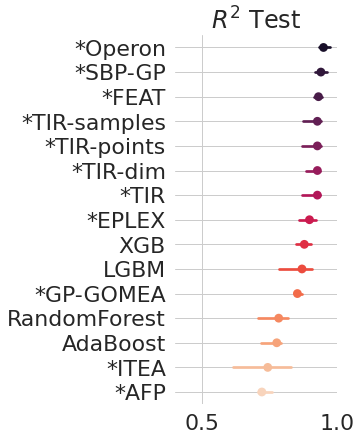

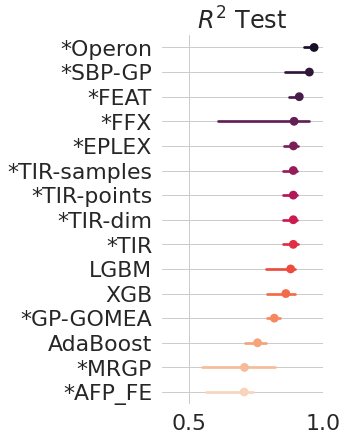

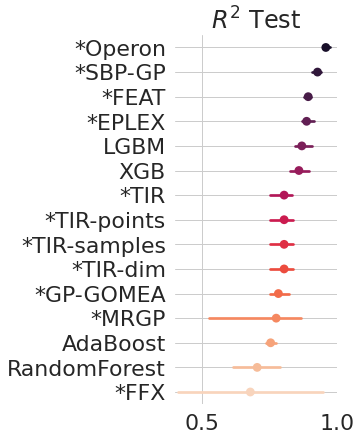

In [61]:

for cat in ['c0', 'c1', 'c2', 'c3', 'c4']:
    names = df_datasets[(df_datasets.name.str.contains("_fri_")) & (df_datasets.name.str.contains(f"{cat}"))].name.values
    plot_selection(df_plotPenalty, names, f"cat_{cat}", True)
    
for noise in ['5', '10', '25', '50']:
    names = df_datasets[(df_datasets.name.str.contains("_fri_")) & (df_datasets.name.str.endswith(f"_{noise}"))].name.values
    plot_selection(df_plotPenalty, names, f"noise_{noise}", True)

In [ ]:
df_datasets[df_datasets.name.str.contains("_fri_")].name.values
df_datasets

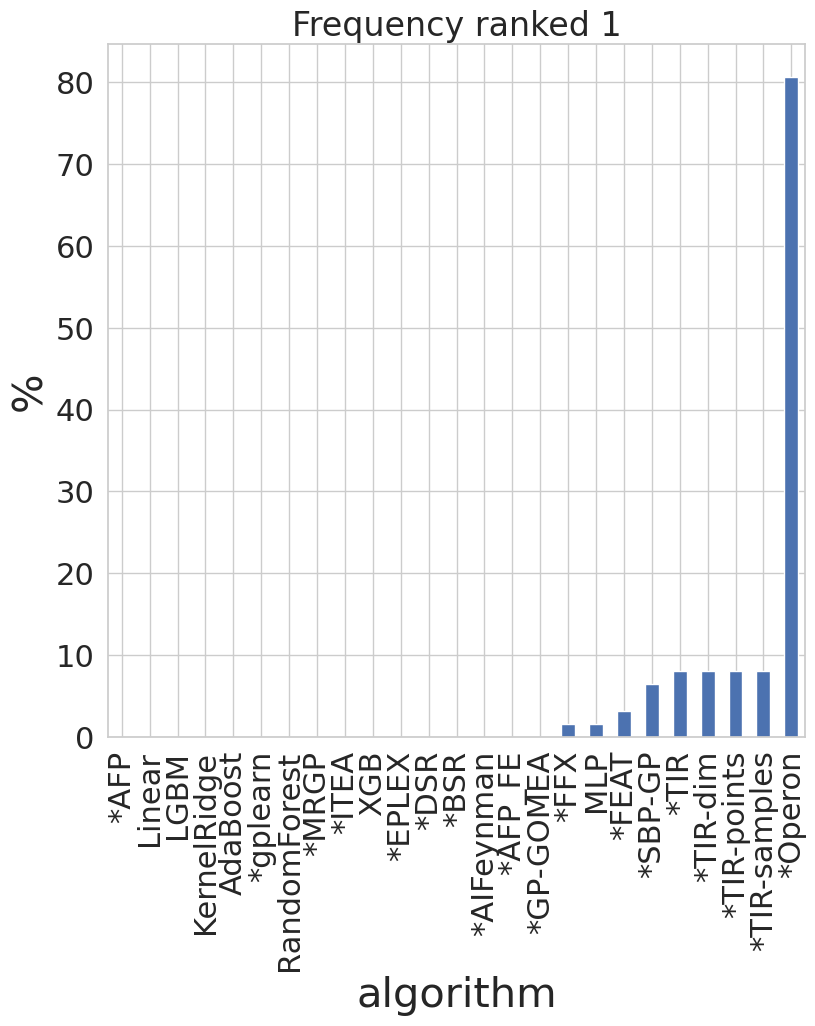

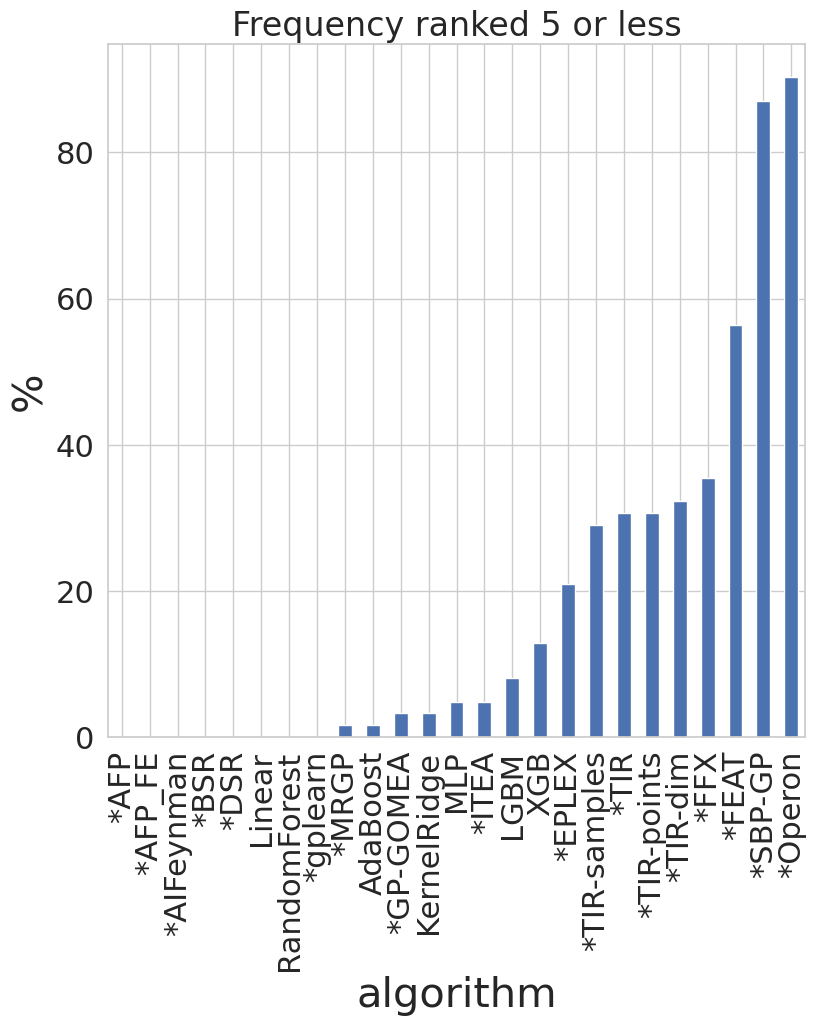

In [21]:
df_pivot = pd.pivot_table(df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")], index='algorithm', columns=['dataset'], values='r2_test').apply(lambda x: np.round(x,4))
ranks = df_pivot.rank(ascending=False, method='min')
plt.rcParams.update({'font.size': 30, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
n = len(ranks.columns)

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 2 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 1')
plt.savefig('figs/hist1fri.pdf', bbox_inches="tight")

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 5 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 5 or less')
plt.savefig('figs/hist5fri.pdf', bbox_inches="tight")

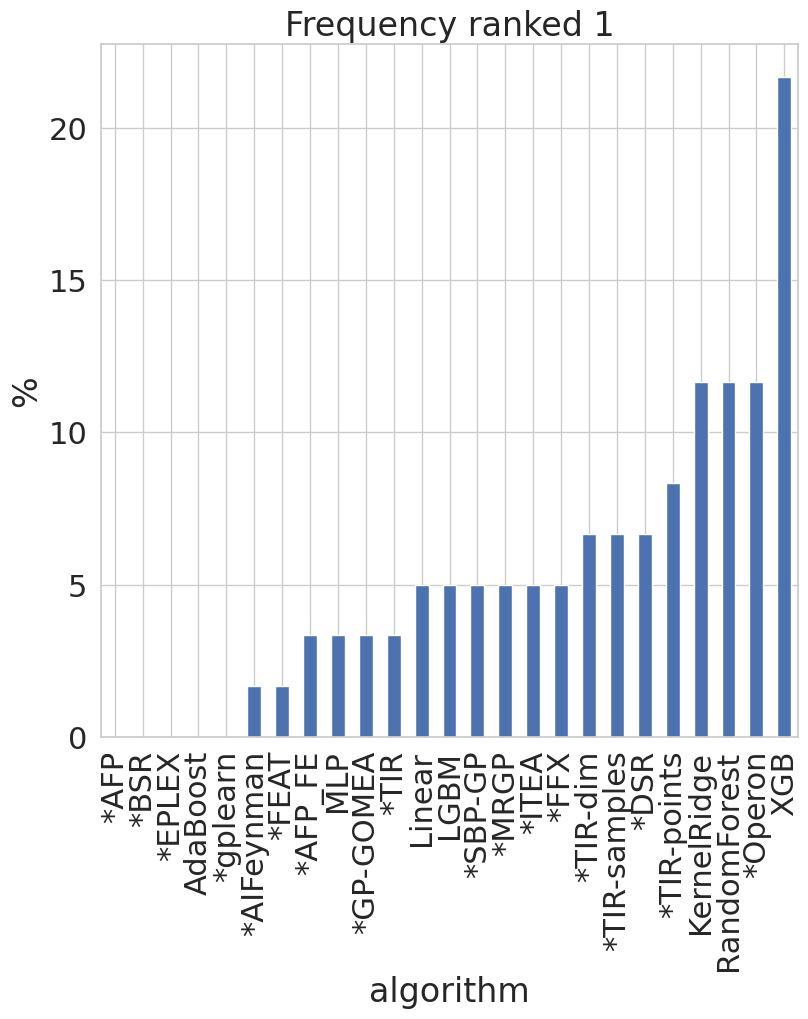

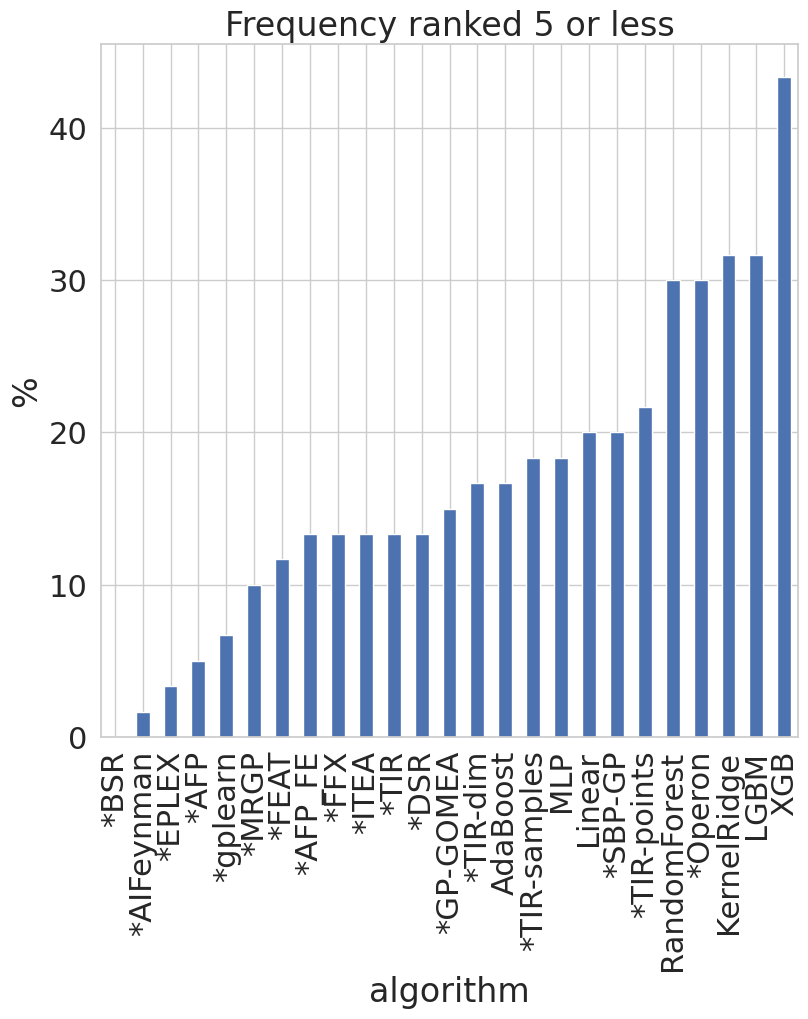

In [20]:
df_pivot = pd.pivot_table(df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")], index='algorithm', columns=['dataset'], values='r2_test').apply(lambda x: np.round(x,4))
ranks = df_pivot.rank(ascending=False, method='min')
plt.rcParams.update({'font.size': 30, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
sns.set(font_scale=2)
sns.set_style("whitegrid")
n = len(ranks.columns)

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 2 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 1')
plt.savefig('figs/hist1nonfri.pdf', bbox_inches="tight")

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 5 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 5 or less')
plt.savefig('figs/hist5nonfri.pdf', bbox_inches="tight")

In [3]:
datanames = df_nl.dataset.values
df_tironly = df_plotPenalty[(df_plotPenalty.dataset.isin(datanames)) & (df_plotPenalty.algorithm.str.contains("TIR-points"))]

df_compare = pd.concat([df_tironly, df_nl])

df_compare

df_pivot = pd.pivot_table(df_compare, index='dataset', columns=['algorithm'], values='r2_test').apply(lambda x: np.round(x,4))
print(df_pivot.style.to_latex(hrules=True, position='h!'))

\begin{table}[h!]
\begin{tabular}{lrr}
\toprule
algorithm & *TIR-points & *TIRNL \\
dataset &  &  \\
\midrule
1089_USCrime & 0.819800 & 0.810200 \\
1096_FacultySalaries & 0.740100 & 0.714900 \\
192_vineyard & 0.601200 & 0.559100 \\
207_autoPrice & 0.849200 & 0.823500 \\
228_elusage & 0.790000 & 0.738800 \\
485_analcatdata_vehicle & 0.421300 & 0.461000 \\
523_analcatdata_neavote & 0.940000 & 0.940300 \\
560_bodyfat & 0.995200 & 0.993600 \\
593_fri_c1_1000_10 & 0.941100 & 0.941100 \\
594_fri_c2_100_5 & 0.556400 & 0.268800 \\
596_fri_c2_250_5 & 0.915200 & 0.733600 \\
606_fri_c2_1000_10 & 0.942200 & 0.926000 \\
624_fri_c0_100_5 & 0.741400 & 0.699100 \\
626_fri_c2_500_50 & 0.713500 & 0.667800 \\
659_sleuth_ex1714 & 0.619700 & 0.533200 \\
663_rabe_266 & 0.984100 & 0.984500 \\
678_visualizing_environmental & 0.339500 & 0.220500 \\
687_sleuth_ex1605 & 0.274700 & 0.370900 \\
690_visualizing_galaxy & 0.971800 & 0.921900 \\
712_chscase_geyser1 & 0.773300 & 0.761700 \\
\bottomrule
\end{tabular}
\e